## Quiver and Stream Plots

In this section, you will learn how to build quiver and stream plots using Matplotlib.

### Quiver Plots

A quiver plot is a type of 2D plot that shows vector lines as arrows. Quiver plots are useful in Electrical Engineering to visualize electrical potential and useful in Mechanical Engineering to show stress gradients.

#### Quiver plot with one arrow

First, we'll build a simple quiver plot that contains one arrow to demonstrate how Matplotlib's ```ax.quiver()``` method works. The ```ax.quiver()``` method takes four positional arguments: 

```python
ax.quiver(x_pos, y_pos, x_direct, y_direct)
```

Where ```x_pos``` and ```y_pos``` are the arrow starting positions and ```x_direct```, ```y_direct``` are the arrow directions.

Our first plot contains one quiver arrow at the starting point ```x_pos = 0```, ```y_pos = 0```. The quiver arrow's direction is pointing up and to the right ```x_direct = 1```, ```y_direct = 1```.

The following code section builds a quiver plot that contains one arrow.

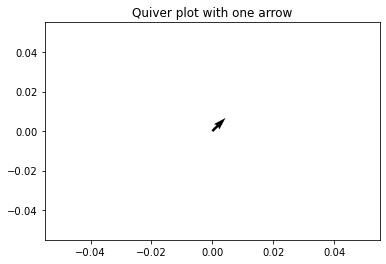

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

fig, ax = plt.subplots()

x_pos = 0
y_pos = 0
x_direct = 1
y_direct = 1

ax.quiver(x_pos, y_pos, x_direct, y_direct)
ax.set_title('Quiver plot with one arrow')

plt.show()

The quiver plot contains one arrow. The arrow starts at point 0, 0 and ends at point 1, 1.

#### Quiver plot with two arrows

Now let's add a second arrow to the quiver plot by passing in two starting points and two arrow directions. 

We'll keep our original arrow starting position at the origin ```0,0``` and pointing up and to the right (in the ```1,1``` direction). We'll define a second arrow with a starting position of ```-0.5,0.5``` which points straight down (in the ```0,-1``` direction).

An additional keyword argument to add the the ```ax.quiver()``` method is ```scale=5```. Including ```scale=5``` scales the arrow lengths so the arrows look longer and show up better on the quiver plot. 

To see the start and end of both arrows, we'll  set the axis limits between ```-1.5``` and ```1.5``` using the ```ax.axis()``` method and pass in a list of axis limits in the form ```[xmin, xmax, ymin, ymax]```.

We can see two arrows. One arrow points to the upper right and the other arrow points straight down.

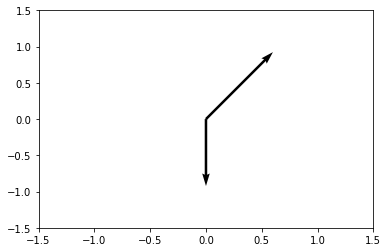

In [2]:
fig, ax = plt.subplots()

x_pos = [0, 0]
y_pos = [0, 0]
x_direct = [1, 0]
y_direct = [1, -1]

ax.quiver(x_pos,y_pos,x_direct,y_direct,
         scale=5)
ax.axis([-1.5, 1.5, -1.5, 1.5])

plt.show()

We see a plot with two arrows. Both arrows start at the origin. One arrow points to the upper right, the other arrow points straight down.

#### Quiver plot using a meshgrid

A quiver plot with two arrows is a good start, but it is tedious and repetitive to add quiver plot arrows one by one. To create a complete 2D surface of arrows, we'll utilize NumPy's ```meshgrid()``` function. 

First, we need to build a set of arrays that denote the x and y starting positions of each quiver arrow on the plot. The quiver arrow starting position arrays will be called ```X``` and ```Y```.

We can use the x, y arrow starting _positions_ to define the x and y components of each quiver arrow _direction_. We will call the quiver arrow direction arrays ```u``` and ```v```. For this plot, we will define the quiver arrow direction based upon the quiver arrow starting point using the equations below.

$$ x_{direction} = cos(x_{starting \ point}) $$

$$ y_{direction} = sin(y_{starting \ point}) $$

The code section below builds the ```X``` and ```Y``` position arrays using NumPy's ```np.meshgrid()``` function.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(0,2.2,0.2)
y = np.arange(0,2.2,0.2)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(y)*Y

Next, we can build the quiver plot using Matplotlib's ```ax.quiver()``` method. Recall the ```ax.quiver()``` method accepts four positional arguments:

```python
ax.quiver(x_pos, y_pos, x_direct, y_direct)
```

In this quiver plot, ```x_pos``` and ```y_pos``` are 2D arrays which contain the starting positions of the arrows and ```x_direct```, ```y_direct``` are 2D arrays which contain the arrow directions.

The commands ```ax.xaxis.set_ticks([])``` and ```ax.yaxis.set_ticks([])``` removes the tick marks from the axis and ```ax.set_aspect('equal')``` sets the aspect ratio of the plot to 1:1.

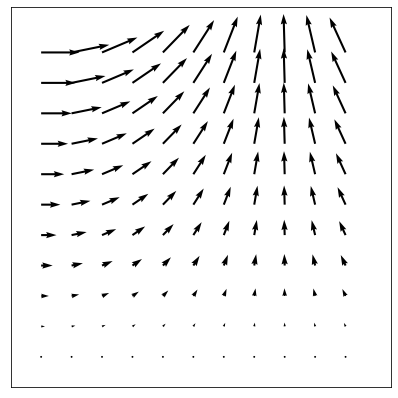

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
ax.quiver(X,Y,u,v)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-0.2, 2.3, -0.2, 2.3])
ax.set_aspect('equal')

plt.show()

Now let's build another quiver plot where the $\hat{i}$ and $\hat{j}$ components (the direction) of the force arrows, $\vec{F}$ are dependent on the arrow starting point $x,y$ according to the function:

$$ \vec{F} = \frac{x}{5} \ \hat{i} - \frac{y}{5} \ \hat{j} $$

Again, we will use NumPy's ```np.meshgrid()``` function to build the arrow starting position arrays, then apply our function  $\vec{F}$ to the ```X``` and ```Y``` arrow starting point arrays.

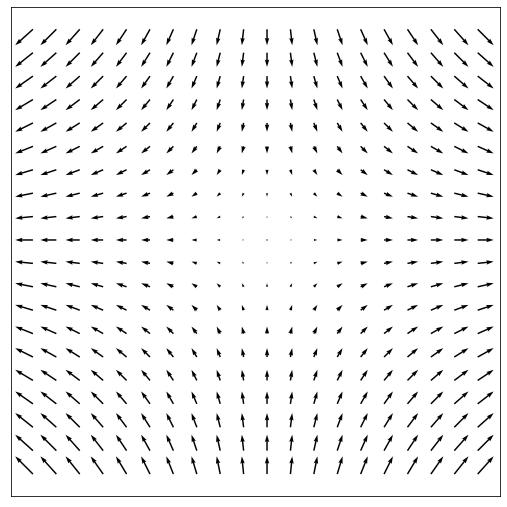

In [5]:
x = np.arange(-1,1,0.1)
y = np.arange(-1,1,0.1)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(Y)*Y

X,Y = np.meshgrid(x,y)

u = X/5
v = -Y/5

fig, ax = plt.subplots(figsize=(9,9))

ax.quiver(X,Y,u,v)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

plt.show()

#### Quiver plot containing a gradient

Next let's build a quiver plot that shows a gradient function. The gradient function has the form:

$$ z = xe^{-x^2-y^2} $$

We can use NumPy's ```np.gradient()``` function to apply the gradient function to every arrow's x, y starting position.

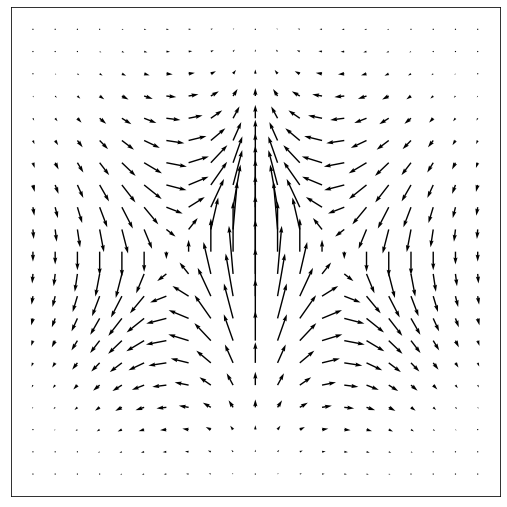

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(-2,2.2,0.2)
y = np.arange(-2,2.2,0.2)

X, Y = np.meshgrid(x, y)
z = X*np.exp(-X**2 -Y**2)
dx, dy = np.gradient(z)

fig, ax = plt.subplots(figsize=(9,9))

ax.quiver(X,Y,dx,dy)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

plt.show()

#### Quiver plot with four vortices

Now let's build a quiver plot that contains four vortices. The function $\vec{F}$ which describes the 2D field that has four vortices is shown below.

$$ \vec{F} = sin(x)cos(y) \ \hat{i} -cos(x)sin(y) \ \hat{j} $$

The code section below builds a quiver plot with four vortices.

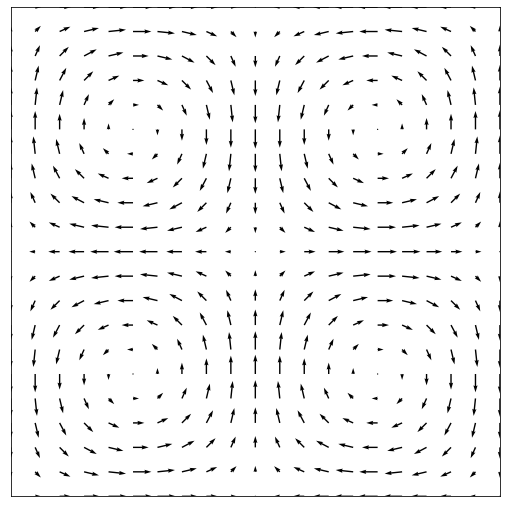

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)
y = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)

X,Y = np.meshgrid(x,y)

u = np.sin(X)*np.cos(Y)
v = -np.cos(X)*np.sin(Y)

fig, ax = plt.subplots(figsize=(9,9))

ax.quiver(X,Y,u,v)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([0,2*np.pi,0,2*np.pi])
ax.set_aspect('equal')

plt.show()

#### Quiver plots with color

Finally, let's add some color to our quiver plots. The ```ax.quiver()``` method has an optional fifth positional argument that specifies the quiver arrow color. The quiver arrow color argument needs to have the same dimensions as the position and direction arrays.

```python
ax.quiver(x_pos, y_pos, x_direct, y_direct, color)
```

Using Matplotlib subplots, we can build a figure which contains three quiver plots. Each quiver plot will be in color.

The code section below builds a figure with three subplots. Each subplot is a colored quiver plot.

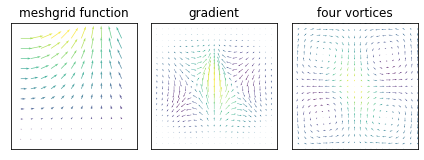

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

# first subplot
x = np.arange(0,2.2,0.2)
y = np.arange(0,2.2,0.2)
X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(y)*Y
n = -2
color = np.sqrt(((v-n)/2)**2 + ((u-n)/2)**2)

ax1.quiver(X,Y,u,v,color, alpha=0.8)

ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.axis([-0.2, 2.3, -0.2, 2.3])
ax1.set_aspect('equal')
ax1.set_title('meshgrid function')

# second subplot
x = np.arange(-2,2.2,0.2)
y = np.arange(-2,2.2,0.2)
X, Y = np.meshgrid(x, y)
z = X*np.exp(-X**2 -Y**2)
dx, dy = np.gradient(z)
n = -2
color = np.sqrt(((dx-n)/2)**2 + ((dy-n)/2)**2) 

ax2.quiver(X,Y,dx,dy,color)

ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_aspect('equal')
ax2.set_title('gradient')

# third subplot
x = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)
y = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)
X,Y = np.meshgrid(x,y)
u = np.sin(X)*np.cos(Y)
v = -np.cos(X)*np.sin(Y)
n = -1
color = np.sqrt(((dx-n)/2)**2 + ((dy-n)/2)**2)

ax3.quiver(X,Y,u,v,color)

ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([])
ax3.axis([0,2*np.pi,0,2*np.pi])
ax3.set_aspect('equal')
ax3.set_title('four vortices')

# save and show the figure
plt.tight_layout()
fig.savefig('3_quiver_plots.png', dpi=300, bbox_inches='tight')

plt.show()

### Stream Plots

A stream plot is a type of 2D plot used to show fluid flow and 2D field gradiants. 

The basic method to build a stream plot in Matplotlib is:

```python
ax.streamplot(x_grid,y_grid,x_vec,y_vec, density=spacing)
```

Where ```x_grid``` and ```y_grid``` are arrays of x, y points. The arrays ```x_vec``` and ```y_vec``` denote the stream velocity at each point on the grid. The keyword argument ```density=spacing``` specifies how close the streamlines are drawn together.

#### A simple stream plot

Let's start with a stream plot that contains stream lines on a 10 x 10 grid.  All the stream lines on the plot are parallel and point to the right.

The following code section builds a stream plot that contains horizontal parallel lines pointing to the right.

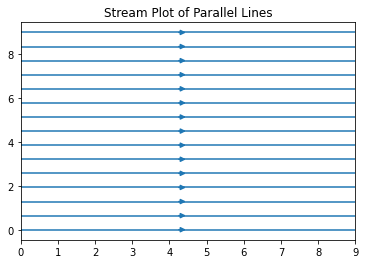

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(0,10)
y = np.arange(0,10)

X, Y = np.meshgrid(x,y)
u = np.ones((10,10)) # x-component to the right
v = np.zeros((10,10)) # y-component zero

fig, ax = plt.subplots()

ax.streamplot(X,Y,u,v, density = 0.5)
ax.set_title('Stream Plot of Parallel Lines')
plt.show()

The plot contains parallel streamlines all pointing to the right.

#### Stream plot of a field

We can build a stream plot which shows field lines based on a defined 2D vector field.

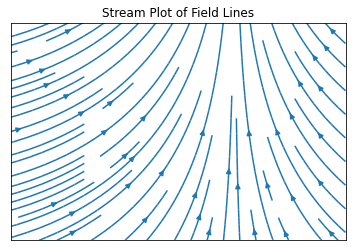

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(0,2.2,0.1)
y = np.arange(0,2.2,0.1)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(y)*Y

fig, ax = plt.subplots()

ax.streamplot(X,Y,u,v, density = 1)
ax.axis([0.5,2.1,0,2])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_title('Stream Plot of Field Lines')

plt.show()

#### Stream plot of two point charges

Finally, we will build a stream plot to demonstrate the electric field due to two point charges.  The electric field at any point on a 2D surface depends on the position and distance relative to the two point charges.

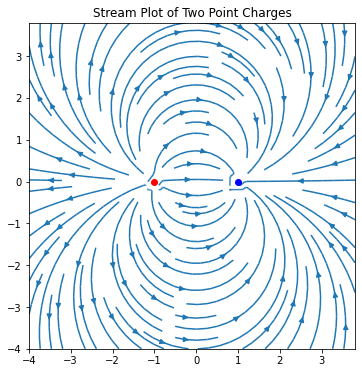

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(-4,4,0.2)
y = np.arange(-4,4,0.2)

X,Y = np.meshgrid(x,y)
Ex = (X + 1)/((X+1)**2 + Y**2) - (X - 1)/((X-1)**2 + Y**2)
Ey = Y/((X+1)**2 + Y**2) - Y/((X-1)**2 + Y**2)

fig, ax = plt.subplots(figsize=(6,6))

ax.streamplot(X,Y,Ex,Ey)

ax.set_aspect('equal')
ax.plot(-1,0,'-or')
ax.plot(1,0,'-ob')
ax.set_title('Stream Plot of Two Point Charges')

plt.show()